## Name: Deepanshu Mittal
## Roll No: MDS202320

IMPORT RELEVANT LIBRARIES

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from nltk.tokenize import word_tokenize
from contractions import fix
import matplotlib.pyplot as plt
import seaborn as sns

DATA FILE PATH

In [142]:
filepath= r"D:\CMI\SEM4\AML\Assignment_1\SMSSpamCollection"

LOAD THE DATASET

In [143]:
df = pd.read_csv(filepath, sep="\t", header=None, names=["label", "message"])
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


BASIC OVERVIEW OF THE DATASET

In [144]:
df.shape

(5572, 2)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [146]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [147]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [148]:
def check_nulls_and_duplicates(df):

    null_count = df.isnull().sum()  # Total null values in the DataFrame
    duplicate_count = df.duplicated().sum()  # Total duplicate rows

    return {
        "Null Values Count": null_count,
        "Duplicate Rows Count": duplicate_count
    }

In [149]:
check_nulls_and_duplicates(df)

{'Null Values Count': label      0
 message    0
 dtype: int64,
 'Duplicate Rows Count': 403}

In [150]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [151]:
spam_n, ham_n = len(df[df["label"] == "spam"]), len(df[df["label"] == "ham"])
print(f"Percentage of spam emails = {round((spam_n)/(spam_n + ham_n) * 100, 2)}%")
print(f"Percentage of ham emails = {round((ham_n)/(spam_n + ham_n) * 100, 2)}%")

Percentage of spam emails = 13.41%
Percentage of ham emails = 86.59%


Dataset is imbalanced.

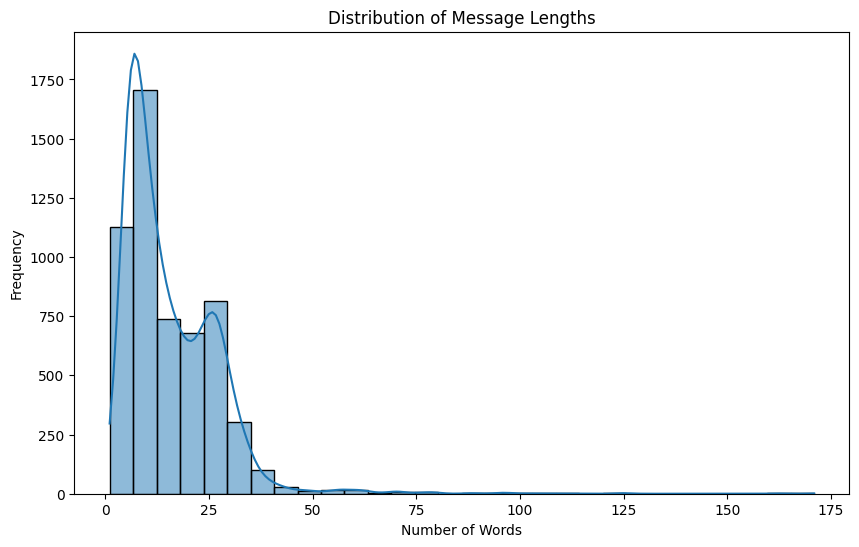

In [152]:
df['message_length'] = df['message'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=30, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.show()

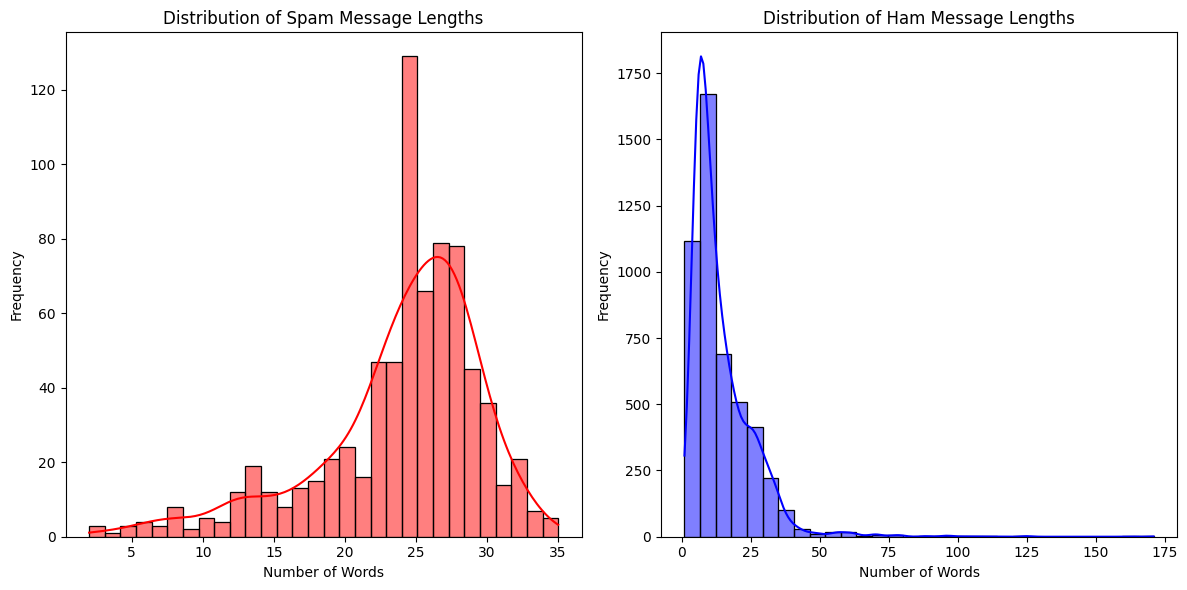

In [153]:
# Separate spam and ham messages
spam_df = df[df['label'] == 'spam']
ham_df = df[df['label'] == 'ham']

# Plot the distributions
plt.figure(figsize=(12, 6))

# Spam distribution
plt.subplot(1, 2, 1)
sns.histplot(spam_df['message_length'], bins=30, kde=True, color='red')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Spam Message Lengths')

# Ham distribution
plt.subplot(1, 2, 2)
sns.histplot(ham_df['message_length'], bins=30, kde=True, color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Ham Message Lengths')

plt.tight_layout()
plt.show()

From the above graph it is clear that SPAM messages usually have more number of words in them.

In [154]:
df.drop_duplicates(inplace=True)
df.groupby("label").describe()

message_length                                                    
               count       mean        std  min   25%   50%   75%    max
label                                                                   
ham           4516.0  14.239814  11.179471  1.0   7.0  11.0  19.0  171.0
spam           653.0  23.739663   5.931064  2.0  22.0  25.0  28.0   35.0

In [155]:
# Convert labels to binary (ham -> 0, spam -> 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

PREPROCESSING OF MESSAGE

Steps:
- Lowercase
- Expand contractions (e.g., "I'm" → "I am")
- Remove punctuation & special characters
- Remove words with length 1

In [156]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Expand Contractions
    text = fix(text)

    # Remove punctuation and special characters
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization and filtering short words
    words = word_tokenize(text)
    words = [word for word in words if len(word) > 1]

    return " ".join(words)


df["clean_message"] = df["message"].apply(preprocess_text)

# Display preprocessed messages
df.head()


,label,message,message_length,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,6,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in wkly comp to win fa cup final tk...
3,0,U dun say so early hor... U c already then say...,11,you dun say so early hor you already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,nah do not think he goes to usf he lives aroun...


In [157]:
check_nulls_and_duplicates(df)

{'Null Values Count': label             0
 message           0
 message_length    0
 clean_message     0
 dtype: int64,
 'Duplicate Rows Count': 0}

SPLITTING DATA INTO TRAIN, VALIDATION AND TEST DATASET

Breaking the dataset into 70%, 15%, 15% for train, validation and test respectively.

In [158]:
train, val_test = train_test_split(df[["clean_message", "label"]], test_size = 0.30, random_state=42)
val, test = train_test_split(val_test, test_size = 0.50, random_state=42)

SAVING THE SPLITED DATA AS TRAIN.CSV, VALIDATION.CSV, TEST.CSV

In [159]:
train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)